# Определение перспективного тарифа для телеком компании

**Заказчик** — «Мегалайн» — федеральный оператор сотовой связи, коммерческий департамент.

**Цель исследования** - для корректировки рекламного бюджета компании «Мегалайн» по продвижению тарифов «Смарт» и «Ультра», необходимо проанализировать поведение клиентов и сформировать рекомендации по тарифам, какой приносит больше прибыли.

**Исходные данные** — данные 500 пользователей «Мегалайна», представленные в 5 таблицах.



## Изучение и предобработка вводных данных

Загрузим исходные таблицы с данными.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')


Теперь поочередно проверим их и проведем предобработку.

### Звонки

In [2]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls.duplicated().sum()

0

Все строки уникальны.

In [4]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


По полученной информации можно видеть, что столбец даты вне своего формата, также данные содержат нулевые значения в столбце длительности разговора. Посмотрим, какие значения могут принимать столбцы.

In [5]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [6]:
print(calls.query('duration == 0')['duration'].count())
calls.query('duration == 0')['duration'].count() / 202607 * 100

39613


19.551644316336553

Видим, что в столбце "Длительность" с данными все в порядке. Но есть 19,6% нулевых строк и нецелое значение минут. 
Нулевые значения оставим, так как при группировке они не мешают.
Из особенности работы оператора известно, что секунды в любом количестве округляются до целой минуты. Следовательно, округлим значения вверх.

In [7]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype(int)

In [8]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Теперь преобразуем столбец с датой в соответствующий формат

In [9]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


In [10]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Готово, таблица обработана.

### Интернет

In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Из очевидных вопросов:
- лишний столбец Unnamed;
- неокругленный столбец mb;
- столбец с датой не соответствующего формата.

Проведем также проверку содержимого столбцов.

In [13]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [14]:
internet['id'].describe()

count     149396
unique    149396
top       1051_8
freq           1
Name: id, dtype: object

In [15]:
internet['user_id'].describe()

count    149396.000000
mean       1252.099842
std         144.050823
min        1000.000000
25%        1130.000000
50%        1251.000000
75%        1380.000000
max        1499.000000
Name: user_id, dtype: float64

Проблем с содержимым не видно. Приступим к исправлению структурных вопросов.

In [16]:
internet = internet.drop('Unnamed: 0', axis = 1)

Столбец удален, теперь округлим мегабайты вверх в соответствии с их тарификацией.

In [17]:
internet['mb_used'] = np.ceil(internet['mb_used'])
internet['mb_used'] = internet['mb_used'].astype(int)


In [18]:
internet.head(5)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


Последним шагом приведем к формату дату.

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int32         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 4.0+ MB


Таблица обработана.

### Сообщения

In [20]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [21]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Приведем дату в соответствие.

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [23]:
messages.duplicated().sum()

0

### Тарифы

In [24]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [25]:
tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Тут все в порядке.

### Пользователи

In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [27]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Сделаем следующее:
- приведем дату в соответствующий формат;
- проверим столбец возраст и город на наполнение, корректность;
- проверим таблицу на повторки.

In [28]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [29]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [30]:
users.duplicated().sum()

0

Данные впорядке, повторов нет.

In [31]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Все исходные данные просмотрены и проверены.

## Подготовка данных для анализа

В рамках задачи необходимо исследовать прибыльность тарифных планов. Для этой цели анализ необходимо проводить в месячном разрезе, так как оплата и расходы тарифицируются по месяцам. Для этого сгруппируем данные по месяцам и объединим в одну таблицу data.

### Звонки

Для начала добавим столбец с указанием месяца.

In [32]:
calls['month'] = calls['call_date'].dt.month

In [33]:
calls['call_date'].astype('datetime64[M]')

0        2018-07-01
1        2018-08-01
2        2018-06-01
3        2018-09-01
4        2018-12-01
            ...    
202602   2018-12-01
202603   2018-10-01
202604   2018-11-01
202605   2018-10-01
202606   2018-12-01
Name: call_date, Length: 202607, dtype: datetime64[ns]

In [34]:
calls.head(5)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [35]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 7.0+ MB


Теперь сгруппируем.

In [36]:
calls_grouped = calls.pivot_table(index = ['user_id', 'month'], \
                                  values = 'duration', aggfunc = ['count','sum']).reset_index()
calls_grouped.head(5)

,user_id,month,count,sum
,,,duration,duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


Отлично, теперь видно какой клиент в какой месяц сколько минут говорил и сколько звонков сделал.
Теперь заменим индекc в таблице.

In [37]:
calls_grouped.columns = ['user_id', 'month', 'count_calls', 'sum_minutes']
calls_grouped.columns

Index(['user_id', 'month', 'count_calls', 'sum_minutes'], dtype='object')

In [38]:
calls_grouped.head(5)

,user_id,month,count_calls,sum_minutes
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [39]:
calls_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      3174 non-null   int64
 1   month        3174 non-null   int64
 2   count_calls  3174 non-null   int64
 3   sum_minutes  3174 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 86.9 KB


### Интернет

In [40]:
internet['month'] = internet['session_date'].dt.month

In [41]:
internet.head(5)

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


Теперь сгруппируем.

In [42]:
internet_grouped = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['count','sum']).reset_index()
internet_grouped.head(5)

,user_id,month,count,sum
,,,mb_used,mb_used
0,1000,5,5,2256
1,1000,6,49,23257
2,1000,7,29,14016
3,1000,8,29,14070
4,1000,9,27,14581


Отлично, теперь видно какой клиент в какой месяц сколько и в каком объеме пользовался интернетом.
Теперь заменим индекc в таблице.

In [43]:
internet_grouped.columns = ['user_id', 'month', 'count_internet', 'sum_mb']
internet_grouped.columns

Index(['user_id', 'month', 'count_internet', 'sum_mb'], dtype='object')

In [44]:
internet_grouped.head(5)

,user_id,month,count_internet,sum_mb
0,1000,5,5,2256
1,1000,6,49,23257
2,1000,7,29,14016
3,1000,8,29,14070
4,1000,9,27,14581


In [45]:
internet_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         3203 non-null   int64
 1   month           3203 non-null   int64
 2   count_internet  3203 non-null   int64
 3   sum_mb          3203 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 87.7 KB


### Сообщения

In [46]:
messages['month'] = messages['message_date'].dt.month

In [47]:
messages.head(5)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Теперь сгруппируем.

In [48]:
messages_grouped = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count').reset_index()
messages_grouped.head(5)

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Отлично, теперь видно какой клиент в какой месяц сколько направил смс.
Теперь заменим индекc в таблице.

In [49]:
messages_grouped.columns = ['user_id', 'month', 'count_messages']
messages_grouped.columns

Index(['user_id', 'month', 'count_messages'], dtype='object')

In [50]:
messages_grouped.head(5)

,user_id,month,count_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [51]:
messages_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         2717 non-null   int64
 1   month           2717 non-null   int64
 2   count_messages  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


### Объединение данных

Для подсчета финансовых показателей затрат клиентов необходимо объединить таблицы.

1 шаг - Звонки и Интернет

In [52]:
m1 = calls_grouped.merge(internet_grouped, on= ['user_id','month'], how='outer')

2 шаг - Звонки и Сообщения

In [53]:
m2 = m1.merge(messages_grouped, on= ['user_id','month'], how='outer')

In [54]:
m2.head(5)

,user_id,month,count_calls,sum_minutes,count_internet,sum_mb,count_messages
0,1000,5,22.0,159.0,5.0,2256.0,22.0
1,1000,6,43.0,172.0,49.0,23257.0,60.0
2,1000,7,47.0,340.0,29.0,14016.0,75.0
3,1000,8,52.0,408.0,29.0,14070.0,81.0
4,1000,9,58.0,466.0,27.0,14581.0,57.0


In [55]:
m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   count_calls     3174 non-null   float64
 3   sum_minutes     3174 non-null   float64
 4   count_internet  3203 non-null   float64
 5   sum_mb          3203 non-null   float64
 6   count_messages  2717 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


Отлично. Теперь подключим к новой таблице персональные данные.

In [56]:
m3 = m2.merge(users, on= 'user_id', how='outer')
m3.head(15)

,user_id,month,count_calls,sum_minutes,count_internet,sum_mb,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,5.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,49.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,29.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,29.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,27.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10.0,57.0,350.0,27.0,14717.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11.0,43.0,338.0,24.0,14768.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12.0,46.0,333.0,21.0,9827.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11.0,59.0,430.0,55.0,18452.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12.0,63.0,414.0,41.0,14053.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


In [57]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   month           3214 non-null   float64       
 2   count_calls     3174 non-null   float64       
 3   sum_minutes     3174 non-null   float64       
 4   count_internet  3203 non-null   float64       
 5   sum_mb          3203 non-null   float64       
 6   count_messages  2717 non-null   float64       
 7   age             3216 non-null   int64         
 8   churn_date      189 non-null    object        
 9   city            3216 non-null   object        
 10  first_name      3216 non-null   object        
 11  last_name       3216 non-null   object        
 12  reg_date        3216 non-null   datetime64[ns]
 13  tariff          3216 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
me

По какой-то причине, количество строк увеличилось на 2, то есть у нас имеются 2 клиента, по которым нет сведений. Посмотрим их.

In [58]:
m3.query('month.isnull() == True', engine = 'python')

,user_id,month,count_calls,sum_minutes,count_internet,sum_mb,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Целесообразно удалить эти строки.

In [59]:
m3 = m3.dropna(subset = ['month'])
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3214 non-null   int64         
 1   month           3214 non-null   float64       
 2   count_calls     3174 non-null   float64       
 3   sum_minutes     3174 non-null   float64       
 4   count_internet  3203 non-null   float64       
 5   sum_mb          3203 non-null   float64       
 6   count_messages  2717 non-null   float64       
 7   age             3214 non-null   int64         
 8   churn_date      187 non-null    object        
 9   city            3214 non-null   object        
 10  first_name      3214 non-null   object        
 11  last_name       3214 non-null   object        
 12  reg_date        3214 non-null   datetime64[ns]
 13  tariff          3214 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
me

Теперь создадим итоговую таблицу data_merged с добавлением сведений о тарифах.

Так как объединение будет производиться по признаку Tariff, то переименуем столбец в таблице tariffs.

In [60]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [61]:
tariffs = tariffs.rename(columns = {'tariff_name': 'tariff'})
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


готово

In [62]:
data_merged = m3.merge(tariffs, on= 'tariff', how='outer')
data_merged.head(5)

,user_id,month,count_calls,sum_minutes,count_internet,sum_mb,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,5.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,49.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,29.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,29.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,27.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [63]:
print(f"Количество клиентов: {data_merged.user_id.nunique()}")

Количество клиентов: 498


In [64]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   float64       
 2   count_calls            3174 non-null   float64       
 3   sum_minutes            3174 non-null   float64       
 4   count_internet         3203 non-null   float64       
 5   sum_mb                 3203 non-null   float64       
 6   count_messages         2717 non-null   float64       
 7   age                    3214 non-null   int64         
 8   churn_date             187 non-null    object        
 9   city                   3214 non-null   object        
 10  first_name             3214 non-null   object        
 11  last_name              3214 non-null   object        
 12  reg_date               3214 non-null   datetime64[ns]
 13  tar

### Подсчет помесячной выручки с каждого пользователя 

Для нахождения выручки добавим новый столбец month_profit, где будет произведен расчет.

Расчет будет осуществлен функцией строки, которая будет применена к столбцу.

In [65]:
def profit(row):
    fee = row['rub_monthly_fee']
    
    if row['sum_minutes'] > row['minutes_included']:
        minutes = row['sum_minutes'] - row['minutes_included']
    else:
        minutes = 0
    if row['sum_mb'] > row['mb_per_month_included']:
        mb = (row['sum_mb'] - row['mb_per_month_included'])/1024
    else:
        mb = 0
    if row['count_messages'] > row['messages_included']:
        sms = row['count_messages'] - row['messages_included']
    else:
        sms = 0
    gb = np.ceil(mb)
    result = minutes * row['rub_per_minute'] + gb * row['rub_per_gb'] + sms * row['rub_per_message'] + fee
    return result

data_merged['month_profit'] = data_merged.apply(profit, axis = 1)
data_merged.head(15)

,user_id,month,count_calls,sum_minutes,count_internet,sum_mb,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_profit
0,1000,5.0,22.0,159.0,5.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,43.0,172.0,49.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,47.0,340.0,29.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,52.0,408.0,29.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,58.0,466.0,27.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10.0,57.0,350.0,27.0,14717.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11.0,43.0,338.0,24.0,14768.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12.0,46.0,333.0,21.0,9827.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1003,8.0,55.0,380.0,15.0,8571.0,37.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950.0
9,1003,9.0,134.0,961.0,22.0,12479.0,91.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950.0


In [66]:
data_merged['month_profit'].describe()

count    3214.000000
mean     1532.592097
std       799.651454
min       550.000000
25%       750.000000
50%      1667.500000
75%      1950.000000
max      6770.000000
Name: month_profit, dtype: float64

In [67]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   float64       
 2   count_calls            3174 non-null   float64       
 3   sum_minutes            3174 non-null   float64       
 4   count_internet         3203 non-null   float64       
 5   sum_mb                 3203 non-null   float64       
 6   count_messages         2717 non-null   float64       
 7   age                    3214 non-null   int64         
 8   churn_date             187 non-null    object        
 9   city                   3214 non-null   object        
 10  first_name             3214 non-null   object        
 11  last_name              3214 non-null   object        
 12  reg_date               3214 non-null   datetime64[ns]
 13  tar

## Анализ данных

Начать анализ предлагается с разделения полученных данных на тарифы, чтобы оценить средние показатели в разрезе тарифа.

In [68]:
data_smart = data_merged[data_merged['tariff'] == 'smart']
data_ultra = data_merged[data_merged['tariff'] == 'ultra']

In [69]:
data_smart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 985 to 3213
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2229 non-null   int64         
 1   month                  2229 non-null   float64       
 2   count_calls            2223 non-null   float64       
 3   sum_minutes            2223 non-null   float64       
 4   count_internet         2228 non-null   float64       
 5   sum_mb                 2228 non-null   float64       
 6   count_messages         1922 non-null   float64       
 7   age                    2229 non-null   int64         
 8   churn_date             111 non-null    object        
 9   city                   2229 non-null   object        
 10  first_name             2229 non-null   object        
 11  last_name              2229 non-null   object        
 12  reg_date               2229 non-null   datetime64[ns]
 13  t

In [70]:
data_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 984
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                985 non-null    int64         
 1   month                  985 non-null    float64       
 2   count_calls            951 non-null    float64       
 3   sum_minutes            951 non-null    float64       
 4   count_internet         975 non-null    float64       
 5   sum_mb                 975 non-null    float64       
 6   count_messages         795 non-null    float64       
 7   age                    985 non-null    int64         
 8   churn_date             76 non-null     object        
 9   city                   985 non-null    object        
 10  first_name             985 non-null    object        
 11  last_name              985 non-null    object        
 12  reg_date               985 non-null    datetime64[ns]
 13  tarif

Начнем анализ с группировки полученного среза по клиентам для понимания, какие значения услуг требуются в среднем.

In [71]:
data_smart_grouped = data_smart.groupby('user_id').mean()
data_smart_grouped.head(5)

,month,count_calls,sum_minutes,count_internet,sum_mb,count_messages,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_profit
user_id,,,,,,,,,,,,,,,
1001,11.5,61.0,422.000000,48.000000,16252.500000,NaN,41,50,15360,500,550,200,3,3,950.000000
1002,9.0,31.0,216.714286,52.714286,16597.571429,10.0,59,50,15360,500,550,200,3,3,1035.714286
1005,6.5,74.0,550.416667,24.083333,8317.750000,46.0,67,50,15360,500,550,200,3,3,827.000000
1006,7.0,46.0,318.272727,46.090909,14945.000000,NaN,21,50,15360,500,550,200,3,3,931.818182
1007,8.0,68.0,486.555556,48.666667,14643.555556,25.0,65,50,15360,500,550,200,3,3,935.666667


In [72]:
data_ultra_grouped = data_ultra.groupby('user_id').mean()
data_ultra_grouped.head(5)

,month,count_calls,sum_minutes,count_internet,sum_mb,count_messages,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_profit
user_id,,,,,,,,,,,,,,,
1000,8.5,46.0,320.750,26.375,13436.5,62.0,52,1000,30720,3000,1950,150,1,1,1950.0
1003,10.0,104.0,764.400,20.800,11465.8,76.0,23,1000,30720,3000,1950,150,1,1,1950.0
1004,8.5,22.0,123.375,37.500,18646.5,149.0,68,1000,30720,3000,1950,150,1,1,1950.0
1013,11.5,71.0,468.000,31.000,15272.5,21.0,36,1000,30720,3000,1950,150,1,1,1950.0
1016,11.5,10.0,61.000,23.500,13417.0,71.0,58,1000,30720,3000,1950,150,1,1,1950.0


Теперь посмотрим на основные столбцы по потреблению услуг

### Звонки

Проведем сравнительный анализ по тарифам.

In [73]:
data_smart_grouped['sum_minutes'].describe()

count    349.000000
mean     420.840147
std      143.473707
min       12.363636
25%      317.545455
50%      425.250000
75%      520.400000
max      891.500000
Name: sum_minutes, dtype: float64

In [74]:
data_ultra_grouped['sum_minutes'].describe()

count     143.000000
mean      546.685442
std       268.338363
min         9.428571
25%       342.883333
50%       525.500000
75%       750.000000
max      1179.363636
Name: sum_minutes, dtype: float64

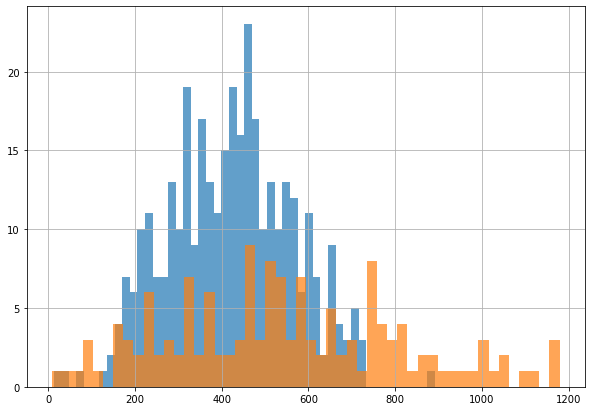

In [75]:
import matplotlib.pyplot as plt
data_smart_grouped['sum_minutes'].hist(bins = 50, grid = True, figsize = (10,7), alpha = 0.7)
data_ultra_grouped['sum_minutes'].hist(bins = 50, grid = True, figsize = (10,7), alpha = 0.7)
plt.show()

Для более детальной проработки построим диаграмму размаха.

<AxesSubplot:>

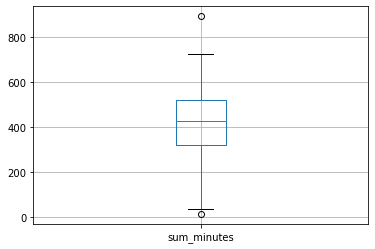

In [76]:
data_smart_grouped.boxplot('sum_minutes')

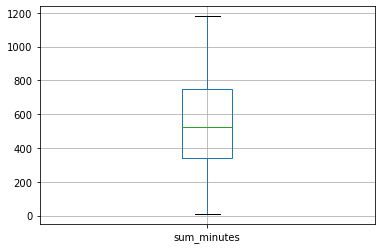

In [77]:
data_ultra_grouped.boxplot('sum_minutes')
plt.show()

По виду гистограмм можно сделать ряд выводов:
- порядка 65% клиентов предпочитают тариф Смарт, что хорошо видно на графике;
- зная, что пороговые значения по минутам 500 и 3000 у тарифов, видно клиенты Смарт в 40% случаев проговаривают минут более тарифа, и таким образом приносят дополнительный доход, и это при стоимости минуты в 3 раза больше. При этом, клиенты Ультра не выговаривают даже трети лимита;
- у обоих тарифов средняя близка к медиане, значит у нас сильных выбросов и хвостов нет, данные однородны;
- судя по диаграммам размаха данные распределены нормально, правило 3 сигм выполняется;
- клиенты тарифа смарт в основном тратят от 300 до 520 минут, в то время как в ультра от 340 до 750. Цифры сопоставимые, можно сделать вывод, не зависимо от вида тарифа, люди говорят примерно одинаковое количество времени. Следовательно, какие-то иные факторы заставляют отдать предпочтение тарифу.

### Интернет

Проведем сравнительный анализ по использованию интернет трафика.

In [78]:
data_smart_grouped['sum_mb'].describe()

count      350.000000
mean     16211.213491
std       3581.630188
min       5391.181818
25%      13962.392857
50%      16289.300000
75%      18620.263889
max      27321.000000
Name: sum_mb, dtype: float64

In [79]:
data_ultra_grouped['sum_mb'].describe()

count      147.000000
mean     19744.885918
std       8178.259984
min       2304.000000
25%      14821.292857
50%      18846.333333
75%      25988.505952
max      38502.000000
Name: sum_mb, dtype: float64

<AxesSubplot:>

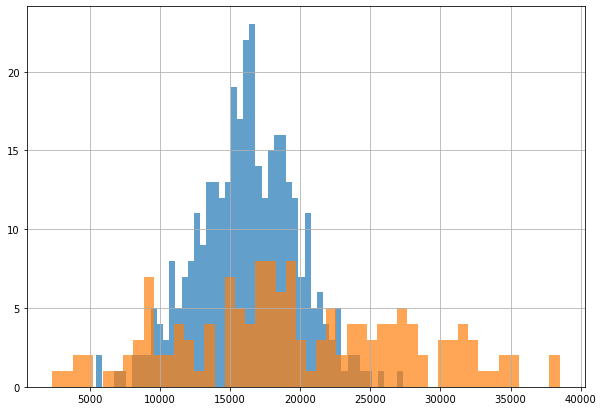

In [80]:
data_smart_grouped['sum_mb'].hist(bins = 50, grid = True, figsize = (10,7), alpha = 0.7)
data_ultra_grouped['sum_mb'].hist(bins = 50, grid = True, figsize = (10,7), alpha = 0.7)

Для более детальной проработки построим диаграмму размаха.

<AxesSubplot:>

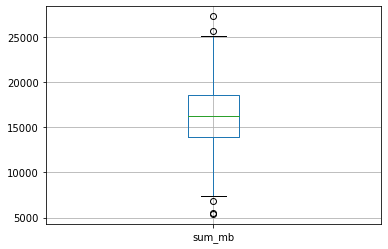

In [81]:
data_smart_grouped.boxplot('sum_mb')

<AxesSubplot:>

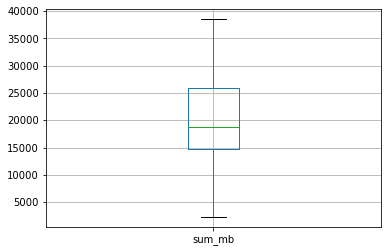

In [82]:
data_ultra_grouped.boxplot('sum_mb')

По виду гистограмм можно сделать ряд выводов:
- картина очень схожа с ситуацией в минутах;
- пороговые значения по трафику 15360 и 30720 мб. у тарифов. Более половины клиентов Смарт перерасходуют трафик более тарифа, и таким образом приносят дополнительный доход. При этом, клиентам Ультра лимита хватает;
- у обоих тарифов средняя близка к медиане, значит у нас сильных выбросов и хвостов нет, данные однородны;
- судя по диаграммам размаха данные Смарт распределены нормально, а вот у Ултра имеется скос в право, то есть большая часть пользователей расходует свыше 18 гб. Однако в рамках условий тарифа доп. дохода это не приносит;
- клиенты тарифа смарт в основном тратят от 14 до 18 гб, в то время как в ультра от 15 до 26. Можно сделать вывод, что в тарифе Ультра в полтора раза больше пользуются интернетом, оно и ясно, лимит то огромный.

### Сообщения

Проведем сравнительный анализ по использованию интернет трафика.

In [83]:
data_smart_grouped['count_messages'].describe()

count    302.000000
mean      37.575606
std       24.849738
min        1.000000
25%       19.000000
50%       33.000000
75%       54.000000
max      118.000000
Name: count_messages, dtype: float64

In [84]:
data_ultra_grouped['count_messages'].describe()

count    124.000000
mean      64.555802
std       43.390612
min        3.000000
25%       28.000000
50%       57.800000
75%       89.000000
max      192.000000
Name: count_messages, dtype: float64

<AxesSubplot:>

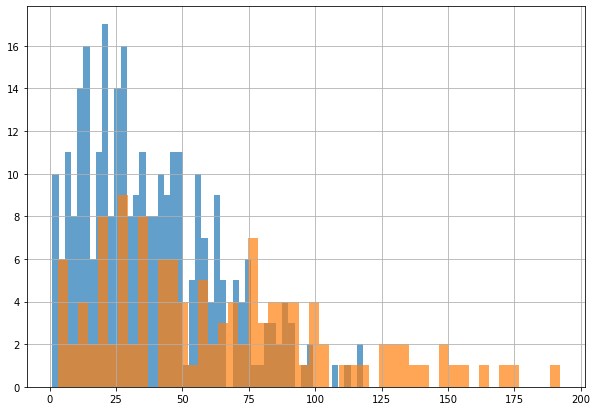

In [85]:
data_smart_grouped['count_messages'].hist(bins = 50, grid = True, figsize = (10,7), alpha = 0.7)
data_ultra_grouped['count_messages'].hist(bins = 50, grid = True, figsize = (10,7), alpha = 0.7)

Для более детальной проработки построим диаграмму размаха.

<AxesSubplot:>

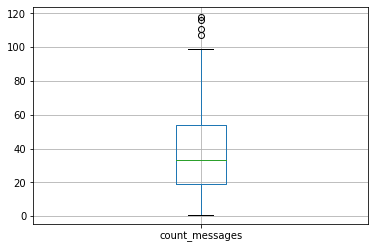

In [86]:
data_smart_grouped.boxplot('count_messages')

<AxesSubplot:>

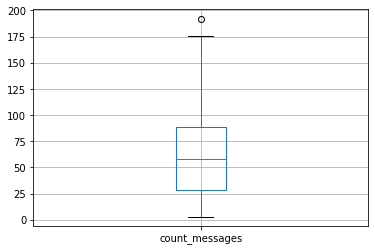

In [87]:
data_ultra_grouped.boxplot('count_messages')

По виду гистограмм можно сделать ряд выводов:
- оба датасета скошены вправо, то есть имеем незначительное число клиентов, кто продолжает писать по многу смс, но по темпу затуханий гисторгамм можно сделать вывод, что люди не активно используют смс;
- пороговые значения по трафику 50 и 1000 смс у тарифов. 25% клиентов Смарт перерасходуют кол-во смс, но не на много. При этом, клиентам Ультра лимита хватает;
- у обоих тарифов средняя близка к медиане, имеются небольшие хвосты в право;
- судя по диаграммам размаха данные Ультра распределены нормально, а вот у Смарт имеется скос в право, то есть большая часть пользователей пишет свыше 33 сообщений;
- клиенты тарифа смарт в основном направляют от 20 до 55 смс, в то время как в ультра от 28 до 89. Цифры сопоставимые, можно сделать вывод, не зависимо от вида тарифа, люди пишут примерно одинаковое количество смс. Оно и ясно, сегодня смс не популярны, клиенты пользуются интернет-мессендерами. Как следствие, сообщений направляют незначительно мало в обоих тарифах.

## Построение гипотез

### Различие средней выручки в тарифах

В рамках анализа оценим основной показатель - средняя выручка пользователей. Проверим, есть ли различия в выручке по тарифам.

In [88]:
data_smart_grouped['month_profit'].describe()

count     350.000000
mean     1329.726499
std       606.851951
min       550.000000
25%       878.541667
50%      1183.100000
75%      1682.694444
max      4333.333333
Name: month_profit, dtype: float64

In [89]:
data_ultra_grouped['month_profit'].describe()

count     148.000000
mean     2087.417442
std       300.847452
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1990.625000
max      3262.500000
Name: month_profit, dtype: float64

<AxesSubplot:>

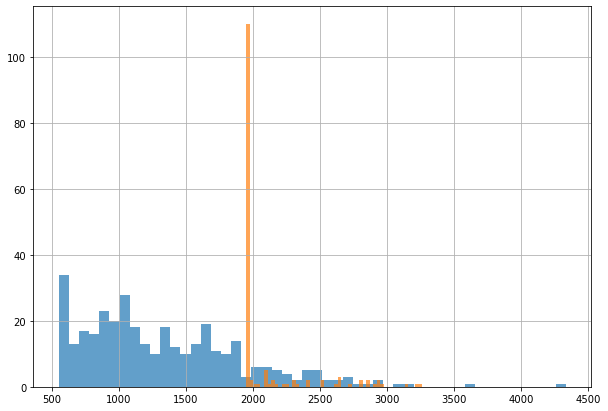

In [90]:
data_smart_grouped['month_profit'].hist(bins = 50, grid = True, figsize = (10,7), alpha = 0.7)
data_ultra_grouped['month_profit'].hist(bins = 50, grid = True, figsize = (10,7), alpha = 0.7)

На полученных результатах видно:
- имеется почти двукратное различие в выручке по медиане и по средней;
- в тарифе Ультра средняя выручка равна цене тарифа, что понятно и соответствует анализу данных в разрезе видов услуг. А именно, по категориям почти никто не превышал тарифные лимиты;
- по тарифу Смарт картина противоположная. В лимиты укладываются 35 человек из 350, то есть 10 %. Все остальные сильно переплачивают, в основном от 400 до 1200 рублей ежемесячно.

Посмотрим еще одну важную цифру, совокупный доход по тарифам:

In [91]:
data_merged.query('tariff == "smart"')['month_profit'].sum()

2885751.0

In [92]:
data_merged.query('tariff == "ultra"')['month_profit'].sum()

2040000.0

In [93]:
(data_merged.query('tariff == "smart"')['month_profit'].sum() - data_merged.query('tariff == "ultra"')['month_profit'].sum()) /data_merged.query('tariff == "smart"')['month_profit'].sum() * 100

29.30783009344881

Выходит, что клиенты Смарт приносят оператору на 30% больше прибыли, чем пользователи Ультра.

Теперь проверим является ли эта разница в средней выручке случайной, есть ли статистическая значимость. Для этой цели будем использовать критерий равенства средних двух генеральных совокупностей, так как Мы имеем две различные по признаку таблицы, при этом схожие по структуре.

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова. 
Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Примем критическим уровнем значимости 0.05.  Стандартные отклонения у выборок сильно разняться (более чем в 2 раза), поэтому параметр возьмем как Ложь.


In [94]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(data_smart_grouped['month_profit'], data_ultra_grouped['month_profit'], equal_var = False) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.5026228308148506e-58
Отвергаем нулевую гипотезу


По результатам проверки гипотеза отвергнута, что ярко подтверждается данными анализа и гистограмм.

### Различие средней выручки в Москве и регионах

Теперь проверим, отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов.

In [95]:
data_moscow = data_merged[data_merged['city'] == 'Москва'].groupby('user_id').mean()
data_moscow.head()

,month,count_calls,sum_minutes,count_internet,sum_mb,count_messages,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_profit
user_id,,,,,,,,,,,,,,,
1001,11.5,61.0,422.000000,48.000000,16252.500000,NaN,41,50,15360,500,550,200,3,3,950.000000
1003,10.0,104.0,764.400000,20.800000,11465.800000,76.0,23,1000,30720,3000,1950,150,1,1,1950.000000
1007,8.0,68.0,486.555556,48.666667,14643.555556,25.0,65,50,15360,500,550,200,3,3,935.666667
1031,11.5,81.0,613.500000,32.500000,10555.000000,26.0,66,50,15360,500,550,200,3,3,890.500000
1033,9.5,52.0,349.666667,65.000000,20929.000000,69.0,71,50,15360,500,550,200,3,3,1914.000000


In [96]:
data_region = data_merged[data_merged['city'] != 'Москва'].groupby('user_id').mean()
data_region.head()

,month,count_calls,sum_minutes,count_internet,sum_mb,count_messages,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_profit
user_id,,,,,,,,,,,,,,,
1000,8.5,46.0,320.750000,26.375000,13436.500000,62.0,52,1000,30720,3000,1950,150,1,1,1950.000000
1002,9.0,31.0,216.714286,52.714286,16597.571429,10.0,59,50,15360,500,550,200,3,3,1035.714286
1004,8.5,22.0,123.375000,37.500000,18646.500000,149.0,68,1000,30720,3000,1950,150,1,1,1950.000000
1005,6.5,74.0,550.416667,24.083333,8317.750000,46.0,67,50,15360,500,550,200,3,3,827.000000
1006,7.0,46.0,318.272727,46.090909,14945.000000,NaN,21,50,15360,500,550,200,3,3,931.818182


Получили таблицы по Москве и регионам.

In [97]:
data_moscow['month_profit'].describe()

count      99.000000
mean     1503.956617
std       604.019842
min       550.000000
25%      1020.833333
50%      1629.428571
75%      1950.000000
max      2935.500000
Name: month_profit, dtype: float64

In [98]:
data_region['month_profit'].describe()

count     399.000000
mean     1567.544739
std       644.791568
min       550.000000
25%      1007.035714
50%      1620.666667
75%      1950.000000
max      4333.333333
Name: month_profit, dtype: float64

<AxesSubplot:>

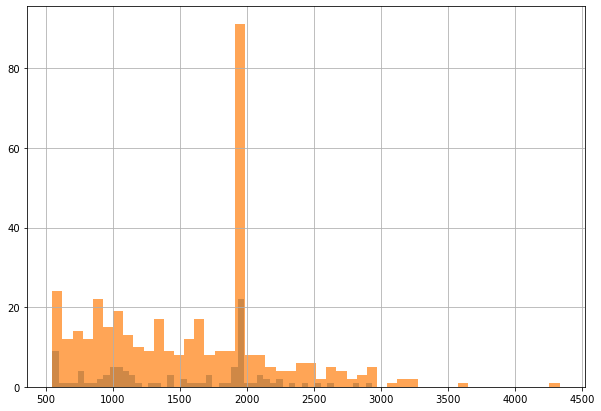

In [99]:
data_moscow['month_profit'].hist(bins = 50, grid = True, figsize = (10,7), alpha = 0.7)
data_region['month_profit'].hist(bins = 50, grid = True, figsize = (10,7), alpha = 0.7)

На полученных результатах видно:
- и средние и медианы по группам равны;
- гистограммы различаются только в масштабе, а так идентичны. По размеру данных видим, что в регионах на 75% клиентов больше.
- в тарифе Ультра средняя выручка равна цене тарифа, что понятно и соответствует анализу данных в разрезе видов услуг. А именно, по категориям почти никто не превышал тарифные лимиты, в связи с чем видим такой пик на 1950.

Теперь проверим предположение, что средняя выручка пользователей в Москве и регионах отличается. Нулевой гипотезой будет равенство средних выручек. Примем критическим уровнем значимости 0.05.  Стандартные отклонения у выборок одинаковы, поэтому параметр возьмем как Истина.


In [100]:
alpha = 0.05

results = st.ttest_ind(data_moscow['month_profit'], data_region['month_profit'], equal_var = True) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.37436457353252284
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы не противоречит выводам из анализа данных о том, что средние выручки по Москве и регионам одинаковы. По стране люди одинаково используют мобильную связь вне зависимости от региона.

## Общий вывод

В рамках исследования проведена комплексная работа с данными:
- на первом этапе исходные таблицы были проверены на предмет ошибок, отстоящих значений;
- приведены в соответствие форматы;
- при подготовке данных выделены средние значения по месяцам в рамках клиента по использованию минут, смс и интернета;
- полученные результаты сведены в одну таблицу, проведены расчеты средней выручки по клиентам;
- анализ данных проводился сперва по видам услуг, так:
    - порядка 65% клиентов предпочитают тариф Смарт;
    - клиенты Смарт в 40% случаев проговаривают минут более тарифа, и таким образом приносят дополнительный доход, и это при стоимости минуты в 3 раза больше;
    - клиенты тарифа смарт в основном тратят от 300 до 520 минут, в то время как в ультра от 340 до 750. Цифры сопоставимые, можно сделать вывод, не зависимо от вида тарифа, люди говорят примерно одинаковое количество времени;
    - пользователи Ультра используют лишь 1000 минут из 3000;
    - более половины клиентов Смарт перерасходуют лимит трафика, при этом, клиентам Ультра лимита хватает;
    - в тарифе Ултра большая часть пользователей расходует свыше 18 гб;
    - клиенты тарифа смарт в основном тратят от 14 до 18 гб трафика;
    - анализ сообщений показал, что в обоих тарифах смс направляют крайне редко и сильного веса в выручке они не имеют;
    - оценка средней выручки по тарифам показала, что тариф Смарт вдвое выгоднее для оператора за счет значительной покупки дополнительных услуг клиентами, в лимиты укладываются лишь 10%;
    - в доходах по регионам и Москве разницы не замечено, а вот клиентов у нашего оператора на 75% больше в регионах;
- для проверки расчетов со средней выручкой были сформулированы гипотезы:
    - о различии средней выручке в тарифах, гипотеза была отвергнута, что говорит о наличии значимой разницы в суммах;
    - о различие средней выручке в Москве и регионах, гипотеза была принята, что говорит о схожести выручки в Москве и регионах.
    
    Таким образом, можно сделать вывод, что тариф Смарт является более массовым и прибыльным для компании, в его продвижение на рынке целесообразно инвестировать средства.
    